# Kmeans Algorithm

In [1]:
import numpy as np
import pandas as pd

## 샘플링 함수

### np.random.choice(a, size=None, replace=True, p=None)

- a: 배열 혹은 정수 범위로, 샘플링 대상
- size: 생성하려는 샘플의 크기를 지정 , 기본값은 None으로, 하나의 샘플을 반환
- replace: 중복 샘플링을 허용할지 여부를 지정. 기본값은 True로, 중복 샘플링을 허용
- p: 각 요소가 선택될 확률을 나타내는 배열. 이 매개변수는 선택 사항, 주어지지 않으면 동일한 확률

In [2]:
samples = np.random.choice(10, 3, replace=False) # 0~9까지의 정수 중 랜덤으로 3개 출력, 중복샘플링 미허용
print(samples)

[4 2 5]


## 유클리드 거리 계산 함수

### np.linalg.norm(point1 - point2)

In [3]:
# 두 점의 좌표 - 벡터를 계산
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

In [4]:
point1

array([1, 2, 3])

In [5]:
# 유클리드 거리 계산
distance = np.linalg.norm(point1 - point2)

print("두 점 사이의 거리:", distance)

두 점 사이의 거리: 5.196152422706632


## 가장 작은 값 반환 함수

### np.argmin()

In [6]:
arr = np.array([3, 7, 1, 9, 2])

In [7]:
min_index = np.argmin(arr)
print("가장 작은 값의 인덱스:", min_index)

가장 작은 값의 인덱스: 2


## 두 배열이 거의 동일한지 확인 함수

### np.allclose(array1, array2)
기준 : 1e-05 (0.00001) - 혀용오차

In [8]:
import numpy as np

# 두 배열 생성
array1 = np.array([1.0, 2.0, 3.0])
array2 = np.array([1.001, 2.002, 3.003])

# 두 배열이 거의 동일한지 확인
result = np.allclose(array1, array2)

print(result)  

False


## Algorithm 설계

- 초기화 단계(Initialization)
    - centroids: 초기 중심을 설정 > np.random.choice() 함수를 사용하여 임의의 k개의 데이터 포인트를 중심으로 선택
- 할당 단계(Assignment):
    - 각 데이터 포인트를 가장 가까운 중심에 할당
    - clusters: 클러스터 할당을 저장할 리스트 초기화
    - 각 데이터 포인트에 대해 모든 중심까지의 거리를 계산하고, 가장 가까운 중심의 인덱스를 찾아 해당 클러스터에 데이터 포인트를 추가

- 업데이트 단계(Update):
    - 각 클러스터에 속한 데이터 포인트들의 평균을 계산하여 새로운 중심을 계산
    - 각 클러스터에 대해 데이터 포인트들의 평균을 계산하여 새로운 중심을 구하고 > new_centroids 리스트에 저장

- 중심점 갱신 & 반복(Iteration):
    - 이전 중심과 새로운 중심이 거의 같으면 알고리즘이 수렴 > break 반복문 탈출 종료합니다
    - 그렇지 않으면 새로운 중심을 이전 중심으로 갱신하고, 새로운 할당 및 업데이트를 수행하여 다음 반복을 진행

- 최대 반복 횟수(max_iterations)에 도달하면 알고리즘을 종료

In [11]:
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
import random

### 가상 데이터셋

In [12]:
X,y = make_blobs(2000, centers = 3, random_state = 19)

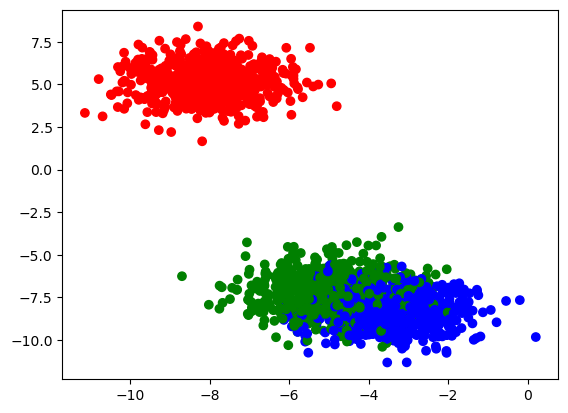

In [13]:
rgb = np.array(["r","g","b",'y'])
plt.scatter(X[:,0],X[:,1], color = rgb[y])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def k_means_clustering(data, k, max_iterations=100):
    # 초기 중심 설정
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]  # 임의의 k개 데이터 포인트를 중심으로 선택
    
    for _ in range(max_iterations):
        # 할당 단계: 각 데이터 포인트를 가장 가까운 중심에 할당
        clusters = [[] for _ in range(k)]  # 클러스터 할당을 저장할 리스트 초기화
        for point in data:
            distances = [np.linalg.norm(point - centroid) for centroid in centroids]  # 모든 중심까지의 거리 계산 - 유클리드
            cluster_index = np.argmin(distances)  # 가장 가까운 중심의 인덱스를 찾음
            clusters[cluster_index].append(point)  # 해당 클러스터에 데이터 포인트 추가
        
        # 업데이트 단계: 각 클러스터에 속한 데이터 포인트들의 평균을 계산하여 새로운 중심을 구함
        new_centroids = []
        for cluster in clusters:
            new_centroid = np.mean(cluster, axis=0)  # 클러스터 내 데이터 포인트들의 평균을 계산하여 새로운 중심 구함
            new_centroids.append(new_centroid)
        
        # 중심이 수렴하면 종료
        if np.allclose(centroids, new_centroids):  # 이전 중심과 새로운 중심이 거의 같으면
            break
        
        centroids = np.array(new_centroids)  # 새로운 중심으로 갱신
    
    return centroids, clusters

def plot_clusters(centroids, clusters):
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # 클러스터 시각화를 위한 색상 리스트
    for i, cluster in enumerate(clusters):
        cluster = np.array(cluster)
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i % len(colors)], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
    plt.title('K-Means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


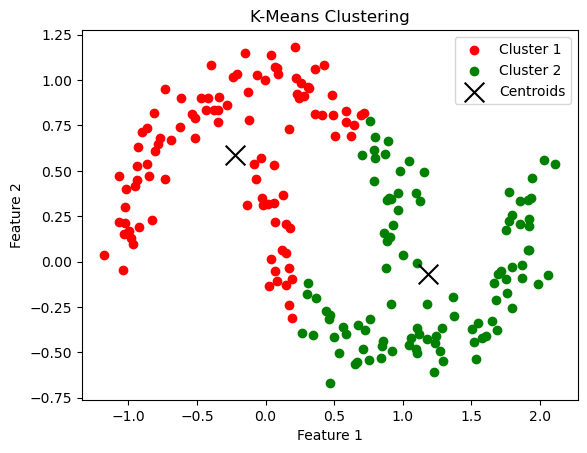

In [15]:
# make_moons 데이터셋 생성
X, _ = make_moons(n_samples=200, noise=0.1, random_state=19)
# k 개수 설정
k = 2 
# 클러스터링 수행
centroids, clusters = k_means_clustering(X, k) # 클러스터링 수행
# 군집 결과 시각화
plot_clusters(centroids, clusters)